<a href="https://colab.research.google.com/github/salexey1990/gb/blob/master/ml_business/hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from random import random

from google.colab import files
import io

import itertools
import warnings

In [2]:

uploaded = files.upload()

Saving my_PJME_MW.csv to my_PJME_MW.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['my_PJME_MW.csv']), index_col=[0], parse_dates=[0])
df_m = df.resample('M').mean()

In [5]:
df_m.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


In [8]:
# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 26)
SARIMAX: (0, 0, 1) x (0, 0, 2, 26)
SARIMAX: (0, 0, 2) x (0, 1, 0, 26)
SARIMAX: (0, 0, 2) x (0, 1, 1, 26)


In [15]:
# warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-30],order=param,
                              seasonal_order=param_seasonal ,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

      results = mod.fit()
      print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
    except Exception as inst:
      continue

ARIMA(0, 0, 0)x(0, 0, 0, 26)3 - AIC:3992.5110075928433
ARIMA(0, 0, 0)x(0, 0, 1, 26)3 - AIC:3285.6570594543073
ARIMA(0, 0, 0)x(0, 0, 2, 26)3 - AIC:3680.418462036925
ARIMA(0, 0, 0)x(0, 1, 0, 26)3 - AIC:2879.425251103865
ARIMA(0, 0, 0)x(0, 1, 1, 26)3 - AIC:2339.9518911250234
ARIMA(0, 0, 0)x(0, 2, 0, 26)3 - AIC:2484.2063624671296
ARIMA(0, 0, 0)x(0, 2, 1, 26)3 - AIC:1888.4709056133695
ARIMA(0, 0, 0)x(1, 0, 0, 26)3 - AIC:2899.327202799901
ARIMA(0, 0, 0)x(1, 0, 1, 26)3 - AIC:2880.0135062256077
ARIMA(0, 0, 0)x(1, 0, 2, 26)3 - AIC:9240.772891705077
ARIMA(0, 0, 0)x(1, 1, 0, 26)3 - AIC:2351.140285803429
ARIMA(0, 0, 0)x(1, 1, 1, 26)3 - AIC:2332.215439889454
ARIMA(0, 0, 0)x(1, 2, 0, 26)3 - AIC:1927.0384944589027
ARIMA(0, 0, 0)x(1, 2, 1, 26)3 - AIC:1899.1945235986527
ARIMA(0, 0, 0)x(2, 0, 0, 26)3 - AIC:2352.194131000001
ARIMA(0, 0, 0)x(2, 0, 1, 26)3 - AIC:2353.02702377021
ARIMA(0, 0, 0)x(2, 0, 2, 26)3 - AIC:2332.9625150017187
ARIMA(0, 0, 0)x(2, 1, 0, 26)3 - AIC:1735.9925256721667
ARIMA(0, 0, 0)x(2, 

KeyboardInterrupt: ignored

лучше всех показала себя модель с параметрами ARIMA(0, 2, 1)x(2, 2, 1, 26)3 - AIC:1240.5288278960659. построим её

In [17]:
#для построения модели используем все данные, кроме 3-х последних месяцев (это будет тестовый набор)
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(df_m['PJME_MW'].values[:-12],order=[0,2,1],
                                seasonal_order=[2,2,1,26] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 1698.6458918848373


In [19]:
print(results_opt.summary().tables[0],results_opt.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 2, 1)x(2, 2, 1, 26)   Log Likelihood                -844.323
Date:                            Tue, 21 Jan 2020   AIC                           1698.646
Time:                                    16:10:25   BIC                           1710.679
Sample:                                         0   HQIC                          1703.477
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

Наблюдаем довольно крупные и весьма однородные коэффициэнты. И теперь оценим как распределены остатки модели

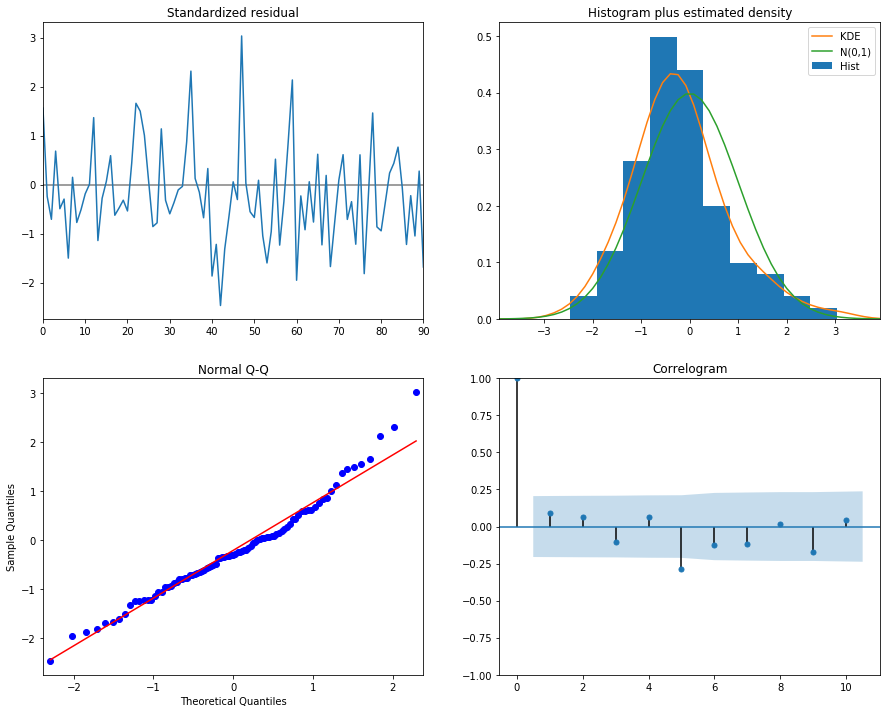

In [20]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Мы видим близкое к нормальному распределение, и отсутствие значимой корреляции с запаздывающими данными. Значит мы можем использовать получившующся модель для анализа нашего ряда. По сравнению с недельным ресемплингом мы видим, что остатки распределены гораздо ближе к стандартному распределению, и небольшая сезонность, которая наблюдалась на графике, в нашем случае уже не наблюдается

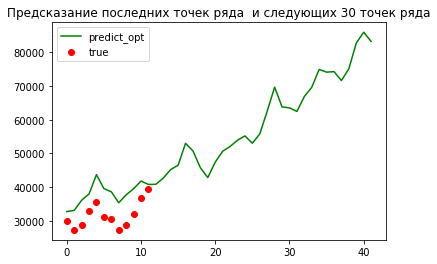

In [21]:
pred_dynamic_opt = results_opt.forecast(42)

plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинный значения 
plt.plot(df_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

Так же как видно из графика, даже последние точки оригинального датасета лежат весьма близка к предсказанию модели